In [1]:
import sys

import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc

from datadispatch import access
from datadispatch.orm import Experiment
from mftools.mfexperiment import MerscopeExperiment, SmallMerscopeExperiment, XeniumExperiment

ROOT = '/mnt/merfish14/MERSCOPE'
NAME = '202404071501_20240407M155BICANRen14_VMSC02201'


/home/erboone/merbot/


In [2]:
def correlation(xdata, ydata, name='', plot:bool=False):
    common = xdata.index.intersection(ydata.index)    
    counts1 = xdata.loc[common]
    counts2 = ydata.loc[common]
    corr = pearsonr(np.log1p(counts1), np.log1p(counts2))
    if plot:
        plt.figure(figsize=(5,5),dpi=120)
        plt.scatter(counts1, counts2, s=1)
        plt.xscale("log")
        plt.yscale("log")
        plt.title(f"{name} r={corr[0]:.03f}")

    return corr

# Loading and preproc. of merfish data

In [3]:
results = access.select("Experiment", where="Metadata.Project == 'BICAN'", wherecomp='!=')
# results = access.select("Experiment", where="RootDirectory.format == 'SMALL_MERSCOPE'", wherecomp='!=')
# results = access.select("Experiment", where={'Experiment.name':None,}, wherecomp='!=')
exps = []
for res in results:
    try:
        match res.root.format:
            case 'MERSCOPE':
                e = MerscopeExperiment(res.rootdir, res.name)
            case 'SMALL_MERSCOPE':
                e = SmallMerscopeExperiment(res.rootdir, res.name)
            case 'XENIUM':
                e = XeniumExperiment(res.rootdir, res.name)
        mfadata = e.create_scanpy_object()
        print(res.meta.BICANExperimentID, mfadata.shape)
        exps.append((res, mfadata))
    except OSError:
        pass

hold = exps.copy()

SELECT experiments.exp_id, experiments.name, experiments.metakey, experiments.nickname, experiments.redundant, experiments.rootdir, experiments.postp_path, metadata_1.name AS name_1, metadata_1."SampleID", metadata_1."Region", metadata_1."Protocol", metadata_1."GenePanel", metadata_1."RIN", metadata_1."BICANExperimentID", metadata_1."MERFISHExperimentID", metadata_1."ExperimentStartDate", metadata_1."MeanTSCPofRegions", metadata_1."MedianTranscriptperCell", metadata_1."MedianGeneperCell", metadata_1."Instrument", metadata_1."AddNotes", metadata_1."TissueType", metadata_1."SampleThickness", metadata_1."ExperimentSuccess", metadata_1."VerificationExperimentID", metadata_1."ImagingDate", metadata_1."Notes", metadata_1."Region0", metadata_1."Region1", metadata_1."Region2", metadata_1."Region3", metadata_1."MeanofRegions", metadata_1."Project", root_dirs_1.root, root_dirs_1.format, root_dirs_1.init_dt 
FROM experiments JOIN metadata ON metadata.name = experiments.metakey JOIN root_dirs ON r

/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filen

REN002 (61204, 500)


/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filen

REN003 (98903, 500)


/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filen

REN001 (58799, 500)


/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/anndata/_core/anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


REN004 (88619, 500)


/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filen

REN014 (81692, 500)


/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filen

REN016 (58731, 500)


/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filen

REN018 (74607, 500)


/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filen

REN020 (86373, 500)


/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filen

REN023 (45146, 500)


/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/anndata/_core/anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during un

REN006 (63821, 500)


/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/anndata/_core/anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


REN008 (65175, 500)


/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filen

REN012 (84988, 500)


/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filen

REN022 (56353, 500)


/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filen

REN005 (55380, 500)


/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filen

REN007 (85227, 500)


/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filen

REN009 (81220, 500)


/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filen

REN010 (107139, 500)


/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filen

REN013 (105421, 500)


/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filen

REN015 (55523, 500)


/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/anndata/_core/anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


REN017 (123518, 500)


/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filen

REN019 (72788, 500)


/home/erboone/miniforge3/envs/pipebase/lib/python3.12/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filen

REN021 (95505, 500)
Setting segmentor
VIZGEN (39004, 500)
Setting segmentor
VIZGEN (39168, 500)
Setting segmentor
VIZGEN (44293, 500)
Setting segmentor
VIZGEN (43874, 500)
Setting segmentor
VIZGEN (37971, 500)
Setting segmentor
VIZGEN (58567, 500)
Setting segmentor
VIZGEN (56728, 500)


In [4]:
exps = hold

In [5]:
mf_mean_exps = []
for res, exp in exps:
    sc.pp.filter_cells(exp, min_counts=5)
    sc.pp.filter_genes(exp, min_cells=10)

    qc_df = sc.pp.calculate_qc_metrics(exp)
    med_tspc = qc_df[0]['total_counts'].quantile(q=.5)
    res.meta.MedianTranscriptperCell = med_tspc
    sc.pp.normalize_total(exp, target_sum=10000)
    mf_mean_exp = sc.get.obs_df(exp, keys=list(mfadata.var_names)).mean(axis=0)
    print(res.meta.BICANExperimentID, res.meta.Region, mf_mean_exp)
    mf_mean_exps.append((res, mf_mean_exp))


REN002 Pu CACNG3     24.559212
TLL1        3.404386
CBLN4       1.287032
TNS1      103.524826
LTBP4       2.321596
             ...    
CFAP46      1.052858
PAX6       29.631227
PHLDB2      9.196992
NCKAP5      5.952576
ARL17B      1.254066
Length: 500, dtype: float32
REN003 CaH CACNG3    40.308472
TLL1       1.849263
CBLN4      4.079884
TNS1      67.736542
LTBP4      3.471839
            ...    
CFAP46     1.903963
PAX6      27.628052
PHLDB2     5.451196
NCKAP5     5.772129
ARL17B     1.000804
Length: 500, dtype: float32
REN001 Pu CACNG3    48.829559
TLL1       1.470713
CBLN4      1.851876
TNS1      90.757721
LTBP4      5.724951
            ...    
CFAP46     1.201157
PAX6      34.378365
PHLDB2     7.739108
NCKAP5     6.707564
ARL17B     0.843866
Length: 500, dtype: float32
REN004 CaB CACNG3    35.846859
TLL1       0.633560
CBLN4      2.219070
TNS1      88.997162
LTBP4      6.477042
            ...    
CFAP46     1.943778
PAX6      28.534575
PHLDB2     3.921176
NCKAP5     9.169817
ARL

# Loading and organizing reference data

In [6]:
reference_series = []

In [7]:
gtex = pd.read_csv('/home/erboone/BICAN/bulk_rnaseq/gene_reads_brain_putamen_basal_ganglia.gct', sep='\t', skiprows=2).reset_index()
gtex = gtex.drop_duplicates(subset='Description')
gtex = gtex.drop(columns=['id', 'Name']).set_index('Description').mean(axis=1)
gtex.name = 'gtex'
reference_series.append(('gTEX', gtex))

In [8]:
ref = pd.read_csv('/mnt/merfish18/BICAN/Reference_Data/bulkRNA/gn_reads.csv')
tpm = pd.read_csv('/mnt/merfish18/BICAN/Reference_Data/bulkRNA/gn_tpm.csv')
ref = ref.join(tpm[['mrna_avg', 'total_avg']], rsuffix='_tpm').set_index('Gene')
reference_series.append(('mRNA_counts', ref['mrna_avg']))
reference_series.append(('total_counts', ref['total_avg']))
# reference_series.append(('mRNA_tpm', ref['mrna_avg_tpm']))
# reference_series.append(('total_tpm', ref['total_avg_tpm']))


56200

In [9]:
ref = ref.join(gtex.rename({'Description':'Gene'})).dropna()

# Running correlations

In [10]:
for i in mf_mean_exps:
    for j in i:
        # print(type(j))
        pass

print(); print()
for i, j in reference_series:
    print(j)



Description
DDX11L1        5.436893e-01
WASH7P         8.418447e+01
MIR6859-1      2.912621e-02
MIR1302-2HG    1.262136e+00
FAM138A        5.728155e-01
                   ...     
MT-ND6         2.893488e+05
MT-TE          5.615971e+02
MT-CYB         2.044036e+06
MT-TT          3.644854e+02
MT-TP          3.562282e+02
Name: gtex, Length: 54592, dtype: float64
Gene
5S_rRNA           0.0000
5_8S_rRNA         0.0000
7SK              40.0035
A1BG             83.6960
A1BG-AS1         43.0000
                  ...   
ZYXP1             0.0000
ZZEF1           595.9165
ZZZ3            312.5370
hsa-mir-1253      0.0000
hsa-mir-423       0.0000
Name: mrna_avg, Length: 39423, dtype: float64
Gene
5S_rRNA           0.0000
5_8S_rRNA         0.0000
7SK              40.1155
A1BG             28.2315
A1BG-AS1         53.0005
                  ...   
ZYXP1             0.0000
ZZEF1           872.4720
ZZZ3            580.6615
hsa-mir-1253      0.0000
hsa-mir-423       0.0000
Name: total_avg, Length: 39423

In [11]:

for res, means in mf_mean_exps:
    id = res.meta.BICANExperimentID
    reg = res.meta.Region
    rin = res.meta.RIN
    med_tspc = res.meta.MedianTranscriptperCell
    print(f"{id},{reg},{rin},{med_tspc}", end=',')
    for ref_name, ref_s in reference_series:
        print(correlation(means, ref_s, name=ref_name)[0], end=',')
    
    print()


REN002,Pu,7.0,28.0,0.645861749401579,0.6425365013399502,0.6132781018032996,
REN003,CaH,7.4,52.0,0.6941276320323531,0.684591041046487,0.6321438304803607,
REN001,Pu,7.0,31.0,0.6668577402278482,0.6550807875615281,0.5983905089818417,
REN004,CaB,6.3,21.0,0.6793635470593052,0.6761860535354204,0.5773454743500628,
REN014,Pu,7.0,56.0,0.6743426401686304,0.667104165562339,0.5909131768806898,
REN016,A44,6.9,210.0,0.5863005076082315,0.5920243203174842,0.5377610770820782,
REN018,Pu,7.0,45.0,0.6647678455158705,0.6632960638742889,0.5759052419440944,
REN020,CaB,6.3,25.0,0.658113470346769,0.6709629584313458,0.5719752147712855,
REN023,Pu,5.9,28.0,0.6798244264673924,0.6688212342824458,0.5759991134348301,
REN006,EC,6.3,27.0,0.6064964261921721,0.6013977586277035,0.5021145377970364,
REN008,M1C,7.5,216.0,0.5917364628550161,0.6063862927914341,0.4955677871870369,
REN012,A10,7.5,114.0,0.5655593518147339,0.5703621180164193,0.47062482794807825,
REN022,A46,7.3,104.0,0.5687812738533056,0.5594143727743865,0.491369531

# More Auxillary plots

Text(0, 0.5, 'mRNA rep 2')

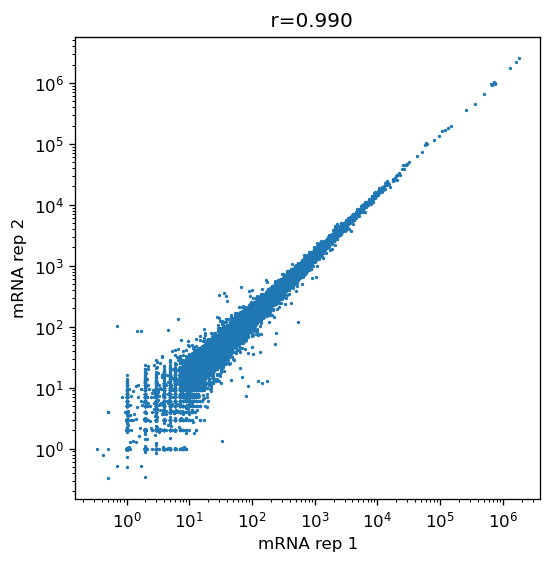

In [12]:
# Correlate replicates
correlation(ref["mrna1"], ref["mrna2"], plot=True)
plt.xlabel("mRNA rep 1")
plt.ylabel("mRNA rep 2")

Text(0, 0.5, 'total rep 2')

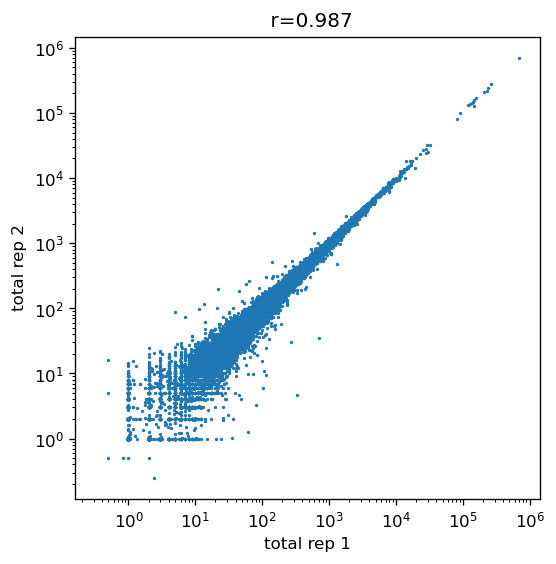

In [13]:
# Correlate replicates
correlation(ref["total1"], ref["total2"], plot=True)
plt.xlabel("total rep 1")
plt.ylabel("total rep 2")

Text(0, 0.5, 'total (mean)')

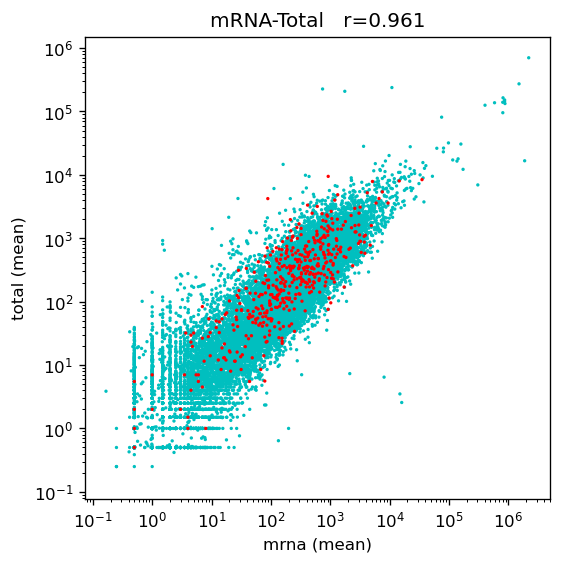

In [14]:
# Correlate replicates
xdata = ref['mrna_avg']
ydata = ref['total_avg']
common = xdata.index.intersection(ydata.index)    
counts1 = xdata.loc[common]
counts2 = ydata.loc[common]
corr = pearsonr(np.log1p(counts1), np.log1p(counts2))

mergenes = common.intersection(exps[0][1].var_names)
colorseries = pd.Series(data='c', index=common)
colorseries[mergenes] = 'r'

df = pd.DataFrame({'mrna':counts1, 'total':counts2, 'color':colorseries})
df.sort_values(by='color', inplace=True)

plt.figure(figsize=(5,5),dpi=120)
plt.scatter(df['mrna'], df['total'], s=1, c=df['color'])
plt.xscale("log")
plt.yscale("log")
plt.title(f"mRNA-Total   r={corr[0]:.03f}")

plt.xlabel("mrna (mean)")
plt.ylabel("total (mean)")

PearsonRResult(statistic=np.float64(0.8585873143300339), pvalue=np.float64(0.0))


Text(0, 0.5, 'gtex (mean)')

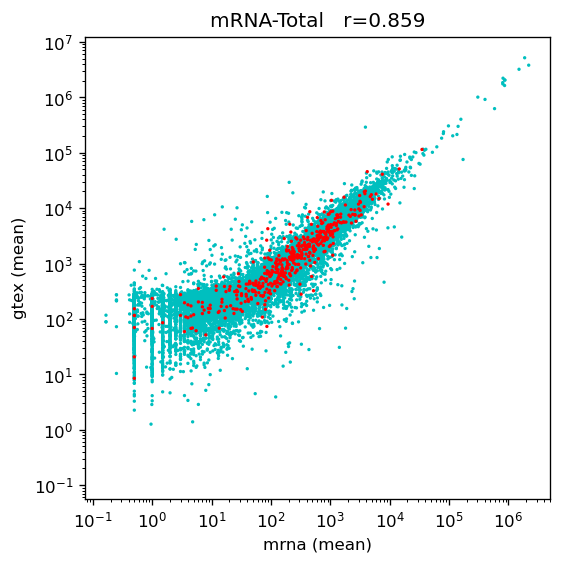

In [15]:
# Correlate replicates
xname = 'mrna_avg'
yname = 'gtex'
xdata = ref[xname]
ydata = ref[yname]

common = xdata.index.intersection(ydata.index)    
counts1 = xdata.loc[common]
counts2 = ydata.loc[common]

corr = pearsonr(np.log1p(counts1), np.log1p(counts2))
print(corr)
mergenes = common.intersection(exps[0][1].var_names)
colorseries = pd.Series(data='c', index=common)
colorseries[mergenes] = 'r'

df = pd.DataFrame({xname:counts1, yname:counts2, 'color':colorseries})
df.sort_values(by='color', inplace=True)

plt.figure(figsize=(5,5),dpi=120)
plt.scatter(df[xname], df[yname], s=1, c=df['color'])
plt.xscale("log")
plt.yscale("log")
plt.title(f"mRNA-Total   r={corr[0]:.03f}")

plt.xlabel("mrna (mean)")
plt.ylabel("gtex (mean)")

PearsonRResult(statistic=np.float64(0.8227933678471945), pvalue=np.float64(0.0))


Text(0, 0.5, 'gtex (mean)')

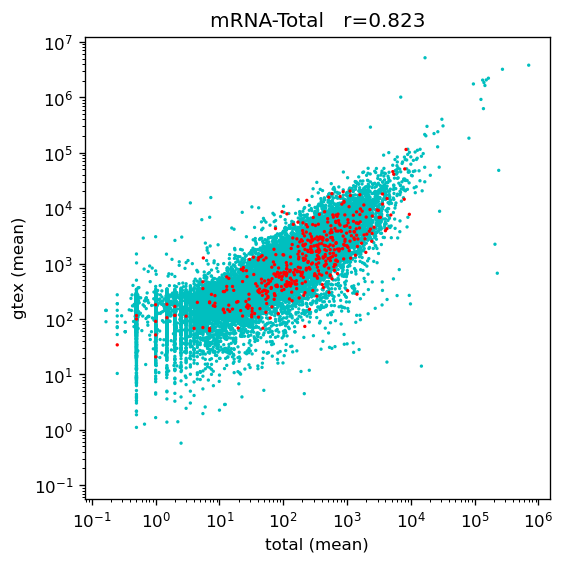

In [16]:
# Correlate replicates
xname = 'total_avg'
yname = 'gtex'
xdata = ref[xname]
ydata = ref[yname]

common = xdata.index.intersection(ydata.index)    
counts1 = xdata.loc[common]
counts2 = ydata.loc[common]

corr = pearsonr(np.log1p(counts1), np.log1p(counts2))
print(corr)
mergenes = common.intersection(exps[0][1].var_names)
colorseries = pd.Series(data='c', index=common)
colorseries[mergenes] = 'r'

df = pd.DataFrame({xname:counts1, yname:counts2, 'color':colorseries})
df.sort_values(by='color', inplace=True)

plt.figure(figsize=(5,5),dpi=120)
plt.scatter(df[xname], df[yname], s=1, c=df['color'])
plt.xscale("log")
plt.yscale("log")
plt.title(f"mRNA-Total   r={corr[0]:.03f}")

plt.xlabel("total (mean)")
plt.ylabel("gtex (mean)")

In [17]:
counts1

Gene
5S_rRNA        0.0000
5_8S_rRNA      0.0000
7SK           40.1155
A1BG          28.2315
A1BG-AS1      53.0005
               ...   
ZYG11AP1       0.0000
ZYG11B       747.4020
ZYXP1          0.0000
ZZEF1        872.4720
ZZZ3         580.6615
Name: total_avg, Length: 33166, dtype: float64

Text(0, 0.5, 'mrna')

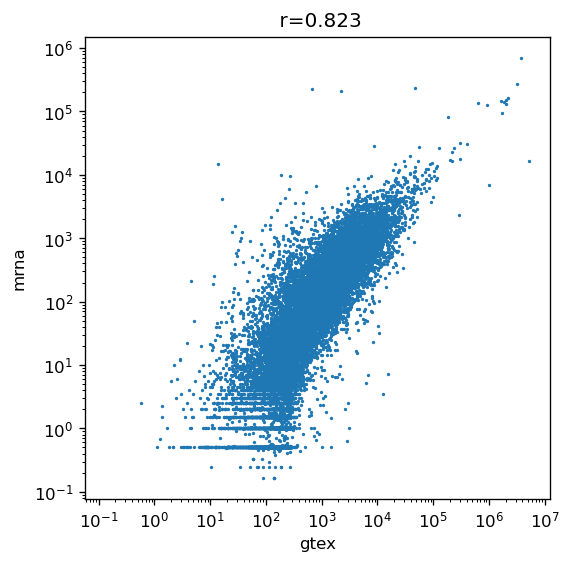

In [18]:
# Correlate replicates
correlation(
    gtex,
    ref['total_avg'],
    plot=True
)
plt.xlabel("gtex")
plt.ylabel("mrna")

In [19]:
ref.index.intersection(gtex.index)

Index(['5S_rRNA', '5_8S_rRNA', '7SK', 'A1BG', 'A1BG-AS1', 'A1CF', 'A2M',
       'A2M-AS1', 'A2ML1', 'A2ML1-AS1',
       ...
       'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11AP1', 'ZYG11B',
       'ZYXP1', 'ZZEF1', 'ZZZ3'],
      dtype='object', length=33166)

In [20]:
temp = ref[["mrna1", 'mrna2']].mean(axis=1)

In [21]:
common = gtex.index.intersection(temp.index)    
counts1 = gtex.loc[common]
counts2 = temp.loc[common]

In [22]:
gtex.index.drop_duplicates().has_duplicates

False

In [23]:
print(counts1, counts2)

DDX11L1        5.436893e-01
WASH7P         8.418447e+01
MIR1302-2HG    1.262136e+00
FAM138A        5.728155e-01
OR4G4P         2.436893e+00
                   ...     
MT-ND6         2.893488e+05
MT-TE          5.615971e+02
MT-CYB         2.044036e+06
MT-TT          3.644854e+02
MT-TP          3.562282e+02
Name: gtex, Length: 33166, dtype: float64 DDX11L1             0.0000
WASH7P            230.1855
MIR1302-2HG         0.9555
FAM138A             0.0000
OR4G4P              0.0000
                  ...     
MT-ND6           3917.6885
MT-TE               0.0000
MT-CYB         879995.3600
MT-TT               0.0000
MT-TP               0.0000
Length: 33166, dtype: float64
